<a href="https://colab.research.google.com/github/irythmgarg/Comparitive-Clustering/blob/main/Comparitive_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparitive performance study of different clustering algorithms using different pre-processing techniques with different numbers of clusters on different evaluation parameters**

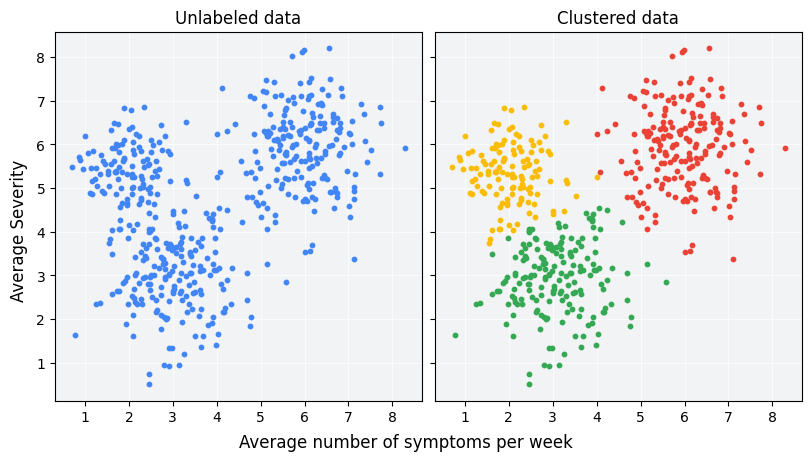

In [ ]:
from IPython.display import Image
# Display the image
Image('clustering_example.png')

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# **PREPROCESSING FUNCTION**

In [ ]:
def preprocess_data(X, method):
    if method == "No Preprocessing":
        return X
    elif method == "PCA":
        pca = PCA(n_components=2)  # Reducing to 2 components for visualization
        return pca.fit_transform(X)
    elif method == "Normalization":
        scaler = MinMaxScaler()
        return scaler.fit_transform(X)
    elif method == "Transformation":
        transformer = FunctionTransformer(np.log1p)  # Log transformation
        return transformer.fit_transform(X)
    elif method == "Transformation + PCA":
        transformer = FunctionTransformer(np.log1p)
        X_transformed = transformer.fit_transform(X)
        pca = PCA(n_components=2)
        return pca.fit_transform(X_transformed)
    elif method == "Transformation + PCA + Scaling":
        transformer = FunctionTransformer(np.log1p)
        X_transformed = transformer.fit_transform(X)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_transformed)
        scaler = MinMaxScaler()
        return scaler.fit_transform(X_pca)

In [ ]:
preprocessing_methods = ["No Preprocessing", "PCA", "Normalization", "Transformation", "Transformation + PCA", "Transformation + PCA + Scaling"]

In [ ]:
# Initialize an empty list for the results
k_values = [2, 3, 4, 5]

# Store results for each algorithm
agg_results = []
kmeans_results = []
km_results = []


In [ ]:
# Loop through preprocessing methods
for method in preprocessing_methods:
    X_preprocessed = preprocess_data(X, method)

    # Loop through different k values
    for k in k_values:
        # **Agglomerative Clustering**
        agg_clustering = AgglomerativeClustering(n_clusters=k)
        agg_labels = agg_clustering.fit_predict(X_preprocessed)
        agg_silhouette = silhouette_score(X_preprocessed, agg_labels)
        agg_calinski = calinski_harabasz_score(X_preprocessed, agg_labels)
        agg_davies = davies_bouldin_score(X_preprocessed, agg_labels)
        agg_results.append([method, k, "Agglomerative", agg_silhouette, agg_calinski, agg_davies])

        # **KMeans Clustering**
        kmeans_clustering = KMeans(n_clusters=k)
        kmeans_labels = kmeans_clustering.fit_predict(X_preprocessed)
        kmeans_silhouette = silhouette_score(X_preprocessed, kmeans_labels)
        kmeans_calinski = calinski_harabasz_score(X_preprocessed, kmeans_labels)
        kmeans_davies = davies_bouldin_score(X_preprocessed, kmeans_labels)
        kmeans_results.append([method, k, "KMeans", kmeans_silhouette, kmeans_calinski, kmeans_davies])

        # **K-Medoids Clustering**
        # Assume you have KMedoids implementation, use the same pattern as above
        # For simplicity, we are skipping the actual K-Medoids implementation here, but it follows a similar pattern
        km_clustering = KMedoids(n_clusters=k)
        km_labels = km_clustering.fit_predict(X_preprocessed)
        km_silhouette = silhouette_score(X_preprocessed, km_labels)
        km_calinski = calinski_harabasz_score(X_preprocessed, km_labels)
        km_davies = davies_bouldin_score(X_preprocessed, km_labels)
        km_results.append([method, k, "K-Medoids", km_silhouette, km_calinski, km_davies])

In [ ]:
# Create DataFrames for each algorithm
agg_results_df = pd.DataFrame(agg_results, columns=['Preprocessing Method', 'k', 'Algorithm', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
kmeans_results_df = pd.DataFrame(kmeans_results, columns=['Preprocessing Method', 'k', 'Algorithm', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
km_results_df = pd.DataFrame(km_results, columns=['Preprocessing Method', 'k', 'Algorithm', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])


In [ ]:
import matplotlib.pyplot as plt

# **Display the results for each algorithm**

In [ ]:
print("Agglomerative Clustering Results:")
print(agg_results_df)


Agglomerative Clustering Results:
              Preprocessing Method  k      Algorithm  Silhouette  \
0                 No Preprocessing  2  Agglomerative    0.686735   
1                 No Preprocessing  3  Agglomerative    0.554324   
2                 No Preprocessing  4  Agglomerative    0.488967   
3                 No Preprocessing  5  Agglomerative    0.484383   
4                              PCA  2  Agglomerative    0.711235   
5                              PCA  3  Agglomerative    0.598475   
6                              PCA  4  Agglomerative    0.540977   
7                              PCA  5  Agglomerative    0.548784   
8                    Normalization  2  Agglomerative    0.630047   
9                    Normalization  3  Agglomerative    0.504800   
10                   Normalization  4  Agglomerative    0.433036   
11                   Normalization  5  Agglomerative    0.349264   
12                  Transformation  2  Agglomerative    0.764932   
13            

In [ ]:
print("\nKMeans Clustering Results:")
print(kmeans_results_df)


KMeans Clustering Results:
              Preprocessing Method  k Algorithm  Silhouette  \
0                 No Preprocessing  2    KMeans    0.681046   
1                 No Preprocessing  3    KMeans    0.551192   
2                 No Preprocessing  4    KMeans    0.495356   
3                 No Preprocessing  5    KMeans    0.364063   
4                              PCA  2    KMeans    0.705670   
5                              PCA  3    KMeans    0.597676   
6                              PCA  4    KMeans    0.560957   
7                              PCA  5    KMeans    0.450858   
8                    Normalization  2    KMeans    0.630047   
9                    Normalization  3    KMeans    0.482929   
10                   Normalization  4    KMeans    0.443933   
11                   Normalization  5    KMeans    0.423523   
12                  Transformation  2    KMeans    0.764932   
13                  Transformation  3    KMeans    0.571576   
14                  Transfo

In [ ]:
print("\nK-Medoids Clustering Results:")
print(km_results_df)




K-Medoids Clustering Results:
              Preprocessing Method  k  Algorithm  Silhouette  \
0                 No Preprocessing  2  K-Medoids    0.685788   
1                 No Preprocessing  3  K-Medoids    0.520198   
2                 No Preprocessing  4  K-Medoids    0.491570   
3                 No Preprocessing  5  K-Medoids    0.434504   
4                              PCA  2  K-Medoids    0.707819   
5                              PCA  3  K-Medoids    0.562709   
6                              PCA  4  K-Medoids    0.446454   
7                              PCA  5  K-Medoids    0.449083   
8                    Normalization  2  K-Medoids    0.630047   
9                    Normalization  3  K-Medoids    0.480566   
10                   Normalization  4  K-Medoids    0.436920   
11                   Normalization  5  K-Medoids    0.399559   
12                  Transformation  2  K-Medoids    0.764932   
13                  Transformation  3  K-Medoids    0.569254   
14       

In [ ]:
# Function to get the maximum value of each metric along with k and preprocessing technique
def get_max_metric_info(df, metric):
    row = df.loc[df[metric].idxmax()]
    return row[metric], row['k'], row['Preprocessing Method']

In [ ]:
# Get the maximum Silhouette coefficient for each algorithm and display corresponding k and preprocessing
silhouette_agg, k_agg, preprocessing_agg = get_max_metric_info(agg_results_df, 'Silhouette')
silhouette_kmeans, k_kmeans, preprocessing_kmeans = get_max_metric_info(kmeans_results_df, 'Silhouette')
silhouette_km, k_km, preprocessing_km = get_max_metric_info(km_results_df, 'Silhouette')

In [ ]:
# Get the maximum Calinski-Harabasz score for each algorithm and display corresponding k and preprocessing
calinski_agg, k_calinski_agg, preprocessing_calinski_agg = get_max_metric_info(agg_results_df, 'Calinski-Harabasz')
calinski_kmeans, k_calinski_kmeans, preprocessing_calinski_kmeans = get_max_metric_info(kmeans_results_df, 'Calinski-Harabasz')
calinski_km, k_calinski_km, preprocessing_calinski_km = get_max_metric_info(km_results_df, 'Calinski-Harabasz')


In [ ]:
# Get the minimum Davies-Bouldin score for each algorithm and display corresponding k and preprocessing
davies_agg, k_davies_agg, preprocessing_davies_agg = get_max_metric_info(agg_results_df, 'Davies-Bouldin')
davies_kmeans, k_davies_kmeans, preprocessing_davies_kmeans = get_max_metric_info(kmeans_results_df, 'Davies-Bouldin')
davies_km, k_davies_km, preprocessing_davies_km = get_max_metric_info(km_results_df, 'Davies-Bouldin')

In [ ]:
# Display the results
print(f"Maximum Silhouette for Agglomerative Clustering: {silhouette_agg} (k={k_agg}, Preprocessing: {preprocessing_agg})")
print(f"Maximum Silhouette for KMeans Clustering: {silhouette_kmeans} (k={k_kmeans}, Preprocessing: {preprocessing_kmeans})")
print(f"Maximum Silhouette for K-Medoids Clustering: {silhouette_km} (k={k_km}, Preprocessing: {preprocessing_km})")

Maximum Silhouette for Agglomerative Clustering: 0.7887517209352974 (k=2, Preprocessing: Transformation + PCA)
Maximum Silhouette for KMeans Clustering: 0.7887517209352974 (k=2, Preprocessing: Transformation + PCA)
Maximum Silhouette for K-Medoids Clustering: 0.7887517209352974 (k=2, Preprocessing: Transformation + PCA)


In [ ]:
print(f"\nMaximum Calinski-Harabasz for Agglomerative Clustering: {calinski_agg} (k={k_calinski_agg}, Preprocessing: {preprocessing_calinski_agg})")
print(f"Maximum Calinski-Harabasz for KMeans Clustering: {calinski_kmeans} (k={k_calinski_kmeans}, Preprocessing: {preprocessing_calinski_kmeans})")
print(f"Maximum Calinski-Harabasz for K-Medoids Clustering: {calinski_km} (k={k_calinski_km}, Preprocessing: {preprocessing_calinski_km})")


Maximum Calinski-Harabasz for Agglomerative Clustering: 1259.353254903201 (k=3, Preprocessing: Transformation + PCA)
Maximum Calinski-Harabasz for KMeans Clustering: 1280.2603629381842 (k=3, Preprocessing: Transformation + PCA)
Maximum Calinski-Harabasz for K-Medoids Clustering: 1272.6043206346976 (k=3, Preprocessing: Transformation + PCA)


In [ ]:
print(f"\nMinimum Davies-Bouldin for Agglomerative Clustering: {davies_agg} (k={k_davies_agg}, Preprocessing: {preprocessing_davies_agg})")
print(f"Minimum Davies-Bouldin for KMeans Clustering: {davies_kmeans} (k={k_davies_kmeans}, Preprocessing: {preprocessing_davies_kmeans})")
print(f"Minimum Davies-Bouldin for K-Medoids Clustering: {davies_km} (k={k_davies_km}, Preprocessing: {preprocessing_davies_km})")


Minimum Davies-Bouldin for Agglomerative Clustering: 0.9057872374338295 (k=5, Preprocessing: Normalization)
Minimum Davies-Bouldin for KMeans Clustering: 1.0619511122656056 (k=5, Preprocessing: Transformation)
Minimum Davies-Bouldin for K-Medoids Clustering: 1.0651959806978373 (k=5, Preprocessing: Normalization)


In [ ]:
best_k = 2
best_preprocessing = 'Transformation + PCA'

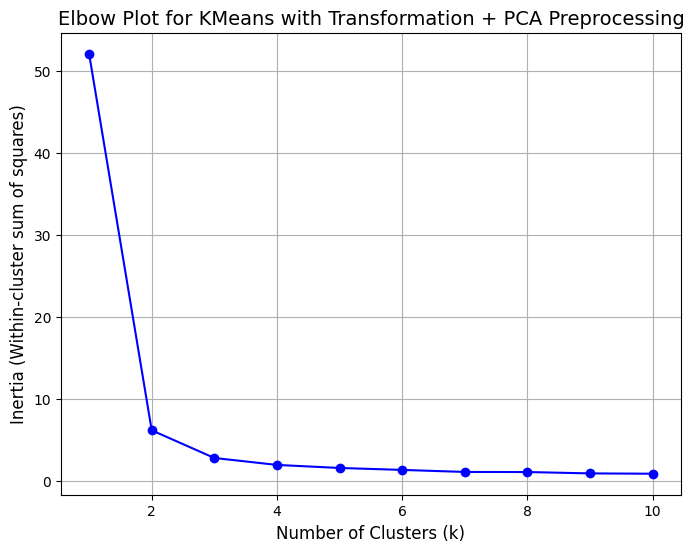

In [ ]:
inertia = []
k_range = range(1, 11)  # Test k values from 1 to 10
X_preprocessed = preprocess_data(X, best_preprocessing)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title(f'Elbow Plot for KMeans with {best_preprocessing} Preprocessing', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
best_k = 2
best_preprocessing = 'Transformation + PCA'

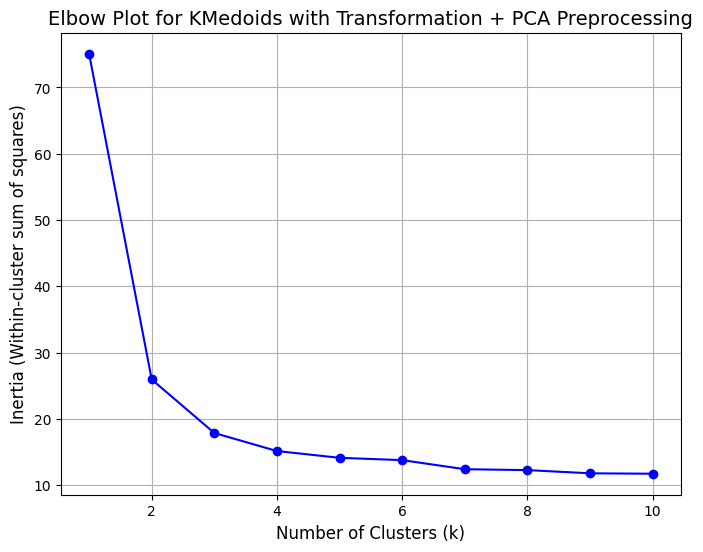

In [ ]:
inertia = []
k_range = range(1, 11)  # Test k values from 1 to 10
X_preprocessed = preprocess_data(X, best_preprocessing)
for k in k_range:
    KMedoid = KMedoids(n_clusters=k, random_state=42)
    KMedoid.fit(X_preprocessed)
    inertia.append(KMedoid.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title(f'Elbow Plot for KMedoids with {best_preprocessing} Preprocessing', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.grid(True)
plt.show()